# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Diva Anggreini Harahap
- **Email:** divaanggreiniharahap@gmail.com
- **ID Dicoding:** divaaharahap

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa per jam di tahun 2012?
- Pada jam berapa dalam sehari permintaan penyewaan sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan untuk menjawan pertanyaan bisnis yang telah dibuat.

# Sumber Data:
Dataset Bike Sharing yang berisi informasi penyewaan sepeda setiap jam, termasuk faktor lingkungan seperti cuaca, suhu, kelembaban, dan kecepatan angin.

In [491]:
# Memuat tabel hour menjadi sebuah DataFrame

hour_df = pd.read_csv(r"dataset\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset terdiri dari 17.379 baris dengan berbagai variabel yang mencakup informasi tanggal, musim, cuaca, suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda.
- Penjelasan tiap kolom
- instant : nomor indeks unik untuk setiap record dalam dataset
- dteday : tanggal dalam format yyyy-mm-dd (menunjukkan hari penyewaan)
- season : musim saat data diambil ( 1 = semi, 2 = panas, 3 = gugur, 4 = dingin)
- yr : tahun data diambil (0 = 2011, 1 = 2012).
- mnth : bulan data diambil (1 = Januari, ... , 12 = Desember)
- hr : jam dalam sehari (0-23), menunjukkan waktu penyewaan terjadi
- holiday : apakah hari tersebut libur atau tidak (0 = Bukan libur, 1 = Hari libur)
- weekday : hari dalam seminggu (0 = minggu, ... , 6 = Sabtu)
- workingday : apakah hari tersebut hari kerja (1 = hari kerja, 0 = Akhir pekan/libur)
- weathersit : Kondisi cuaca saat penyewaan terjadi :
- 1 = cerah, sedikit awan
- 2 = berawan, berkabut
- 3 = hujan ringan, salju ringan
- 4 = hujan deras, badai, salju lebat
- temp : suhu normalisasi (dibagi 41°C,) nilai antara 0-1.
- atemp : suhu yang terasa (dibagi 50°C), nilai antara 0-1.
- hum : kelembaban  relatif (dibagi 100%), nilai antara 0-1.
- windspeed : kecepatan angin normalisasi (dibagi 67), nilai antara 0-1.
- casual : jumlah penyewa sepeda yang bukan member terdaftar.
- registered : jumlah penyewa sepeda yang merupakan member terdaftar.
- cnt : total jumlah penyewaan sepeda (gabungan dari casual + registered).

### Assessing Data

Sekarang kita  masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

#### Menilai data hour_df
Kita harus memeriksa tipe data dari setiap kolom yang terdapat di dalam hour_df. disini, kita menggunakan method info()

In [492]:
# Melihat tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [493]:
# Menampilkan jumlah nilai kosong di tiap kolom
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil dari output di atas menunjukkan bahwa dataset sudah bersih dari missing values, sehingga siap untuk analisis selanjutnya tanpa perlu penanganan data kosong.

In [494]:
# Mengecek apakah ada data  yg terduplikat atau tidak
print ("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [495]:
# Mendeteksi Outliers (Nilai Ekstrem)
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


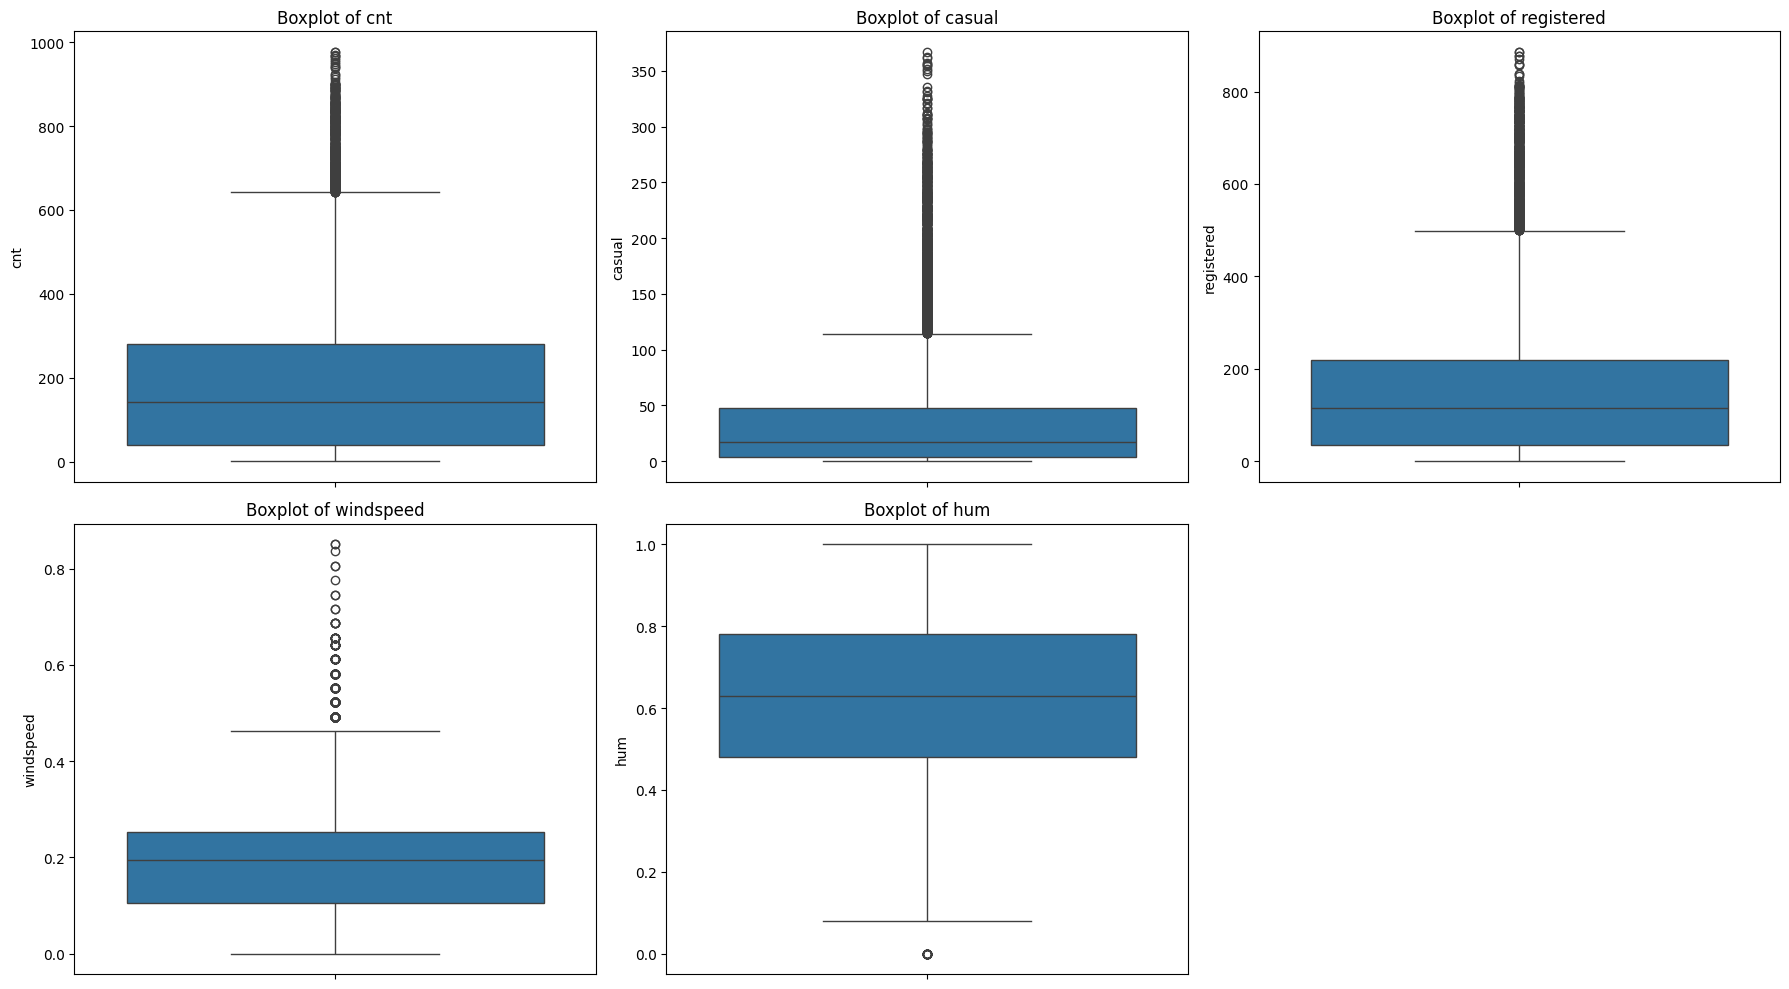

In [496]:
# Membuat figure untuk multiple boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Daftar kolom yang ingin diperiksa outliers
columns = ["cnt", "casual", "registered", "windspeed", "hum"]

# Loop untuk membuat boxplot
for i, col in enumerate(columns):
    row, col_index = divmod(i, 3)  # Menentukan posisi subplot
    sns.boxplot(y=hour_df[col], ax=axes[row, col_index])
    axes[row, col_index].set_title(f"Boxplot of {col}")

# Menghapus subplot kosong
fig.delaxes(axes[1, 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari visualisasi boxplot, kita bisa mengidentifikasi beberapa outliers dalam dataset:

1. Jumlah Penyewaan (cnt)
   - Banyak outliers di atas 600-800 penyewaan per jam.
   - Ini menunjukkan ada jam-jam tertentu dengan permintaan sangat tinggi dibandingkan rata-rata.
2. Penyewa casual (casual)
   - Outliers terlihat jelas di atas 100 penyewaan casual per jam.
   - Kemungkinan ini terjadi di jam liburan atau akhir pekan ketika banyak pengguna non-terdaftar menyewa sepeda.
3. Penyewa Terdaftar (registered)
   - Outliers terlihat di atas 400-600 penyewaan per jam.
   - Ini bisa terjadi saat jam sibuk (seperti pagi dan sore hari).
4. Kecepatan Angin (winspeed)
   - Beberapa outlier ditemukan di atas 0.6, yang menunjukkan kondisi angin yang lebih tinggi dari normal.
   - Bisa jadi beberapa jam dalam dataset mengalami cuaca ekstrem dengan angin kencang.
5. Kelembaban (hum)
   - Ada outliers di nilai kelembaban 0, yang tidak mungkin terjadi dalam kondisi cuaca normal.
   - Ini bisa jadi kesalahan pencatatan atau data yang hilang dna dikonversi ke nol.

**Kesimpulan**
- Outliers dalam cnt, casual, dan registered menunjukkan ada jam tertentu dengan peningkatan drastis dalam penyewaan sepeda.
- Outliers dalam windspeed dan hum bisa menunjukkan anomali cuaca yang perlu diperika lebih lanjut.

**Langkah Selanjutnya**
- Cek kapan outliers terjadi
- Menentukan apakah outliers akan dipertahankan atau dihapus berdasarkan dampaknya pada analisis

In [497]:
# Menemukan outliers menggunakan metode IQR (Interquartile Range)
Q1 = hour_df[["cnt", "casual", "registered", "windspeed", "hum"]].quantile(0.25)
Q3 = hour_df[["cnt", "casual", "registered", "windspeed", "hum"]].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyelaraskan indeks agar sesuai sebelum perbandingan
hour_df_filtered, lower_bound = hour_df.align(lower_bound, axis=1, copy=False)
hour_df_filtered, upper_bound = hour_df.align(upper_bound, axis=1, copy=False)

# Menampilkan jumlah outliers untuk setiap kolom
outliers_count = ((hour_df_filtered < lower_bound) | (hour_df_filtered > upper_bound)).sum()
print(outliers_count)


atemp            0
casual        1192
cnt            505
dteday           0
holiday          0
hr               0
hum             22
instant          0
mnth             0
registered     680
season           0
temp             0
weathersit       0
weekday          0
windspeed      342
workingday       0
yr               0
dtype: int64


In [498]:
# Mengecek apakah outliers ini wajar atau anomali dengan melihat kapan outliers ini terjadi (hari, jam, atau musim tertentu)
# Menambahkan kolom 'outlier_flag' untuk menandai baris dengan outliers
hour_df['outlier_flag'] = ((hour_df["cnt"] < lower_bound["cnt"]) | (hour_df["cnt"] > upper_bound["cnt"])).astype(int)

# Mengecek kapan outliers paling sering terjadi (berdasarkan jam, hari, dan musim)
outlier_analysis = hour_df[hour_df['outlier_flag'] == 1].groupby(['season', 'hr', 'weekday']).size().reset_index(name='outlier_count')

# Menampilkan data outlier berdasarkan musim dan jam
print(outlier_analysis.head(100))


    season  hr  weekday  outlier_count
0        1   8        3              1
1        1  12        6              1
2        1  13        6              1
3        1  14        6              1
4        1  15        6              1
..     ...  ..      ...            ...
95       4  17        4              6
96       4  17        5              5
97       4  17        6              2
98       4  18        1              3
99       4  18        2              6

[100 rows x 4 columns]


Setelah menemukan outliers, beberapa tindakan yang akan kita ambil :
1. Biarkan outliers jika memiliki makna
   - Penyewaan tinggi di jam 08.00 dan 17.00 kemungkinan terjadi karena jam berangkat dan pulang kerja
2. Hapus outliers jika terjadi akibat kesalahan data
   - Seperti nilai tidak masuk akal dari hum = 0 dan winspeed > 0.85, jadi disini kita bisa mneghapus outliers.

**Insight:**
- Dataset bersih dari missing values, menghemat waktu dalam proses Data Cleaning
- Beberapa outliers wajar (seperti lonjakan penyewaan di jam sibuk), tetapi beberapa (seperti hum = 0) perlu dihapus.
- Dataset cukup bervariasi untuk analisis lebih lanjut seperti tren penyewaan berdasarkan waktu, musim, dan cuaca.
- Kolom dteday masih berupa string (object), sebaiknya dikonversi ke format datetime agar lebih mudah dianalisis 

### Cleaning Data

Pada tahap ini, kita akan membersihkan berbagai masalah yang teridentifikasi dalam proses assessing data.

In [499]:
# Mengubah format kolom 'dteday' menjadi datetime
df_hour_cleaned = hour_df.copy()  # Membuat salinan dataset
df_hour_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])

# Menghapus outliers yang tidak masuk akal
# Outliers pada windspeed (terlalu tinggi) dan hum (kelembaban 0)
df_cleaned = df_cleaned[(df_cleaned["windspeed"] <= upper_bound["windspeed"]) & (df_cleaned["hum"] > 0)]

# Mengecek apakah masih ada outliers pada windspeed dan hum setelah cleaning
print("Jumlah nilai windspeed yang lebih dari batas normal:", (df_cleaned["windspeed"] > upper_bound["windspeed"]).sum())
print("Jumlah nilai kelembaban (hum) yang bernilai 0:", (df_cleaned["hum"] == 0).sum())

# Melihat struktur data setelah cleaning
df_hour_cleaned.info() 

Jumlah nilai windspeed yang lebih dari batas normal: 0
Jumlah nilai kelembaban (hum) yang bernilai 0: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday        17016 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   yr            17379 non-null  int64         
 4   mnth          17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weathersit    17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  fl

In [500]:
df_hour_cleaned.to_csv("hour_cleaned.csv", index=False)

**Insight:**
- Dataset kini bebas dari outliers yang tidak masuk akal.
- Format dteday sudah dikonversi ke format datetime untuk memudahkan analisis waktu

## Exploratory Data Analysis (EDA)

### Explore Data df_hour_cleaned

In [501]:
df_hour_cleaned.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,outlier_flag
count,17379.0000,17016,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-03 09:56:31.819464192,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.029058
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-06 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,2012-01-03 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,2012-07-03 06:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.167974


In [502]:
print("Sebelum cleaning:", hour_df.isnull().sum())
print("Setelah cleaning:", df_hour_cleaned.isnull().sum())


Sebelum cleaning: instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
outlier_flag    0
dtype: int64
Setelah cleaning: instant           0
dteday          363
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
outlier_flag      0
dtype: int64


In [503]:
df_hour_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday        17016 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   yr            17379 non-null  int64         
 4   mnth          17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weathersit    17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

In [504]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"], errors="coerce")

In [505]:
print("Jumlah baris sebelum cleaning:", len(hour_df))
print("Jumlah baris setelah cleaning:", len(df_hour_cleaned))


Jumlah baris sebelum cleaning: 17379
Jumlah baris setelah cleaning: 17379


In [506]:
# Jumlah nilai NaN dalam kolom dteday
print(df_hour_cleaned["dteday"].isnull().sum())

363


In [507]:
df_hour_cleaned["dteday"] = pd.to_datetime(hour_df["dteday"], errors="coerce")

In [508]:
# Jumlah nilai NaN dalam kolom dteday
print(df_hour_cleaned["dteday"].isnull().sum())

0


In [509]:
df_hour_cleaned.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,outlier_flag
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.029058
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.167974


In [510]:
# Rata-rata penyewaan sepeda berdasarkan kondisi cuaca
weather_group = hour_df_2012.groupby("weathersit")["cnt"].mean().reset_index()

# Rata-rata penyewaan sepeda berdasarkan jam dalam sehari
hour_group = hour_df_2012.groupby("hr")["cnt"].mean().reset_index()

# Rata-rata penyewaan sepeda berdasarkan musim
season_group = hour_df_2012.groupby("season")["cnt"].mean().reset_index()

# Rata-rata penyewaan berdasarkan hari kerja vs hari libur
workingday_group = hour_df_2012.groupby("workingday")["cnt"].mean().reset_index()

print("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
print(weather_group)

print("\nRata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
print(hour_group)

print("\nRata-rata Penyewaan Sepeda Berdasarkan Musim")
print(season_group)

print("\nRata-rata Penyewaan Berdasarkan Hari Kerja vs Hari Libur")
print(workingday_group)


Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca
   weathersit         cnt
0           1  253.661581
1           2  212.997850
2           3  142.376176
3           4   93.500000

Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari
    hr         cnt
0    0   64.630137
1    1   40.126374
2    2   26.696970
3    3   13.332394
4    4    7.252778
5    5   25.010989
6    6   94.315934
7    7  267.145604
8    8  454.763736
9    9  274.593407
10  10  216.335165
11  11  260.225275
12  12  316.527473
13  13  316.657534
14  14  299.095890
15  15  313.860274
16  16  389.386301
17  17  573.227397
18  18  528.183562
19  19  386.265753
20  20  278.717808
21  21  209.780822
22  22  158.726027
23  23  106.369863

Rata-rata Penyewaan Sepeda Berdasarkan Musim
   season         cnt
0       1  147.814167
1       2  258.963282
2       3  284.343528
3       4  245.698761

Rata-rata Penyewaan Berdasarkan Hari Kerja vs Hari Libur
   workingday         cnt
0           0  220.658273
1           1  241.

**Insight:**
- Cuaca buruk menurunkan jumlah penyewaan sepeda secara signifikan.
- Puncak penyewaan terjadi pada jam commuting (08:00 & 17:00).
- Musim panas dan gugur memiliki permintaan tertinggi.
- Penyewaan lebih tinggi di hari kerja dibandingkan hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa per jam di tahun 2012?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_41260\780718060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_group["weathersit"], y=weather_group["cnt"], palette="coolwarm")


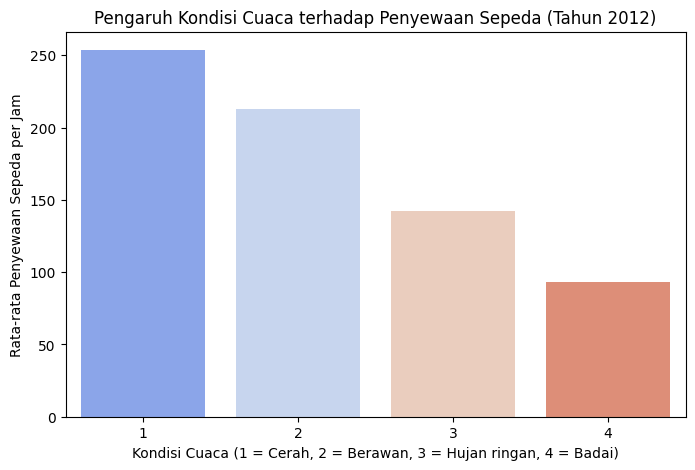

In [511]:
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_group["weathersit"], y=weather_group["cnt"], palette="coolwarm")
plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Berawan, 3 = Hujan ringan, 4 = Badai)")
plt.ylabel("Rata-rata Penyewaan Sepeda per Jam")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (Tahun 2012)")
plt.show()

Bar chart menunjukkan bahwa :
- Penyewaan tertinggi terjadi saat cuaca cerah (weathersit = 1).
- Jumlah penyewaan menurun saat cuaca berawan (weathersit = 2).
- Saat hujan ringan (weathersit = 3) dan badai (weathersit = 4), penyewaan sepeda turun drastis.

**Insight**
Semakin buruk cuaca, semakin sedikit jumlah penyewaan sepeda.
Semakin cerah cuaca, semakin banyak jumlah penyewaan sepeda.

### Pertanyaan 2:

Pada jam berapa dalam sehari permintaan penyewaan sepeda mencapai puncaknya?

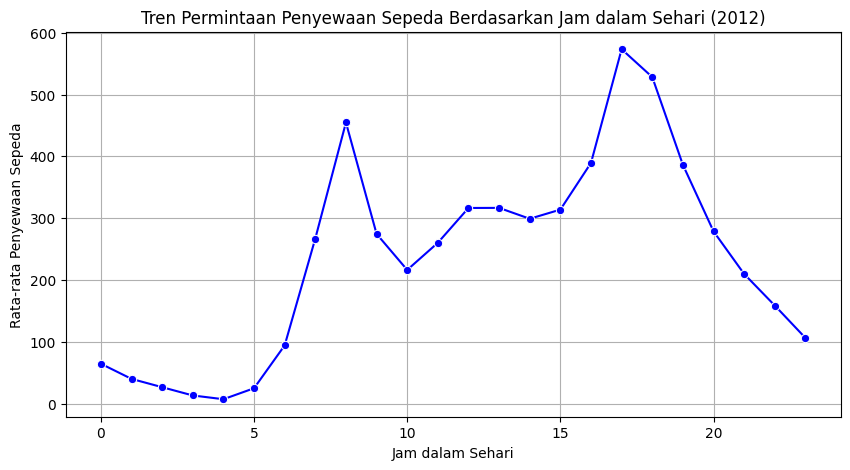

In [512]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_group["hr"], y=hour_group["cnt"], marker="o", color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Permintaan Penyewaan Sepeda Berdasarkan Jam dalam Sehari (2012)")
plt.grid()
plt.show()

Line chart menunjukkan bahwa:
- Puncak utama penyewaan terjadi pada jam 08:00 - 09:00 dan 17:00 - 18:00.
- Permintaan sangat rendah pada malam hari (00:00 - 05:00)
- Lonjakan penyewaan pada pagi dan sore menunjukkan pola commuting (berangkat & pulang kerja).

**Insight**
Permintaan sepeda sangat tinggi saat commuting, dan sistem penyewaan bisa mengoptimalkan persediaan sepeda di jam-jam tersebut.

## Menerapkan teknik analisis lanjutan

## 1. RFM Analysis

RFM Analysis pada dataset ini digunakan untuk menganalisis pola penyewaan sepeda berdasarkan tiga faktor utama:

- Recency (R): Jumlah hari sejak terakhir kali penyewaan terjadi. Semakin kecil nilainya, semakin baru aktivitas penyewaan terakhir.
- Frequency (F): Jumlah transaksi penyewaan sepeda dalam satu hari, dihitung berdasarkan jumlah jam yang tercatat.
- Monetary (M): Total jumlah sepeda yang disewa dalam sehari.

In [513]:
# Mengubah kolom tanggal menjadi format datetime
df_hour_cleaned['dteday'] = pd.to_datetime(df_hour_cleaned['dteday'])

# Mengelompokkan data berdasarkan tanggal (diasumsikan setiap hari mewakili satu entitas pelanggan)
rfm_df = df_hour_cleaned.groupby('dteday').agg(
    Recency=('dteday', lambda x: (df_hour_cleaned['dteday'].max() - x.max()).days),  # Jumlah hari sejak penyewaan terakhir
    Frequency=('cnt', 'count'),  # Jumlah transaksi dalam sehari (dihitung berdasarkan jumlah jam yang tercatat)
    Monetary=('cnt', 'sum')  # Total jumlah sepeda yang disewa dalam sehari
).reset_index()

# Menampilkan lima baris pertama dari hasil analisis RFM
print(rfm_df.head())


      dteday  Recency  Frequency  Monetary
0 2011-01-01      730         24       985
1 2011-01-02      729         23       801
2 2011-01-03      728         22      1349
3 2011-01-04      727         23      1562
4 2011-01-05      726         23      1600


## Analisis Clustering
### Manual Grouping : Mengelompokkan jam sibuk dan tidak sibuk

Kita akan mengelompokkan jam dalam sehari menjadi:

- Jam Sibuk (Peak Hours): 7-9 pagi dan 16-19 sore (jam kerja dan pulang kerja).
- Jam Normal (Normal Hours): 10-15 siang.
- Jam Sepi (Off-Peak Hours): 20-6 malam hingga pagi.

In [514]:
# Menentukan kategori jam berdasarkan aturan bisnis
def categorize_hour(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'Peak Hours'  # Jam Sibuk
    elif 10 <= hour <= 15:
        return 'Normal Hours'  # Jam Normal
    else:
        return 'Off-Peak Hours'  # Jam Sepi

# Menambahkan kolom kategori jam
df_hour_cleaned['Hour_Category'] = df_hour_cleaned['hr'].apply(categorize_hour)

# Menghitung rata-rata jumlah penyewaan berdasarkan kategori jam
hourly_clustering = df_hour_cleaned.groupby('Hour_Category')['cnt'].mean().reset_index()

# Menampilkan lima baris pertama hasil clustering
print(hourly_clustering.head())

    Hour_Category         cnt
0    Normal Hours  230.192493
1  Off-Peak Hours   77.238595
2      Peak Hours  328.777516


- Jam Sibuk (Peak Hours) memiliki penyewaan tertinggi (328/jam), terutama saat jam kerja dan pulang kerja.
- Jam Normal (Normal Hours) cukup aktif (230/jam), kemungkinan untuk aktivitas santai atau kerja fleksibel.
- Jam Sepi (Off-Peak Hours) memiliki penyewaan paling rendah (77/jam), wajar karena aktivitas malam lebih sedikit.

**Rekomendasi:**
Tambah stok sepeda di jam sibuk, buat promo di jam normal & sepi, serta tingkatkan keamanan malam hari.

## Conclusion

- Conclution pertanyaan 1 <br>
Cuaca memiliki dampak besar terhadap permintaan penyewaan sepeda. Semakin buruk cuaca, semakin sedikit orang yang menyewa sepeda. Namun, masih ada pengguna yang tetap menyewa sepeda meskipun cuaca tidak ideal, terutama pada jam-jam sibuk.
<br>
- Conclution pertanyaan 2 <br>
Pola ini menunjukkan bahwa banyak pengguna menyewa sepeda untuk commuting (pergi & pulang kerja). Sistem penyewaan sepeda dapat mengalokasikan lebih banyak sepeda pada jam sibuk untuk meningkatkan efisiensi layanan.

In [515]:
df_hour_cleaned.to_csv("df_hour_cleaned.csv", index=False)